# **Business Understanding & Objective**  

## **Business Understanding**  
Customer complaints are a critical indicator of service quality for financial institutions. Unresolved or mismanaged complaints can lead to customer dissatisfaction, churn, and reputational damage. Efficient handling of complaints not only enhances customer satisfaction but also helps financial firms improve their products and services.  

Currently, customer complaints are submitted as unstructured text and require manual review by support teams to categorize and assign them to the appropriate department. As the company scales, this manual process becomes inefficient, leading to delays in complaint resolution and increased operational costs.  

To address this challenge, the company seeks to automate the classification of customer complaints based on the type of product or service mentioned. By leveraging **Natural Language Processing (NLP)**, the firm aims to streamline complaint handling, ensure timely resolution, and enhance customer experience.  

## **Business Objective**  
The goal of this analysis is to develop an **automated ticket classification model** that categorizes customer complaints into predefined product or service categories. This will enable efficient routing of complaints to the relevant department, reducing resolution time and improving customer satisfaction.  

To achieve this, we will apply **topic modeling** to identify patterns and recurring words in the complaint data. Since the dataset is unstructured and lacks labels, **unsupervised learning techniques** will be used to group complaints into five categories:  

1. **Credit Card / Prepaid Card**  
2. **Bank Account Services**  
3. **Theft/Dispute Reporting**  
4. **Mortgages/Loans**  
5. **Others**  

Once topic modeling is complete, the categorized data can be used to train a **supervised learning model** (e.g., logistic regression, decision trees, or random forests). The final model will allow for **real-time classification** of incoming complaints, ensuring they are directed to the appropriate department with minimal manual intervention.  

This automation will lead to:  
- **Faster complaint resolution**  
- **Improved customer experience**  
- **Better resource allocation** for the company  


## Import libraries 

In [20]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import json
#import os



pd.set_option("display.max_columns", 500)

## Load JSON file

In [21]:
# Define the file path
file_path = "C:/Users/ADMIN/Documents/my_python_projects/Phase-4-Project/automatic-ticket-classifier/complaints.json"

# Load JSON file using 
with open(file_path, 'r') as file:
    data = json.load(file)
    
# Convert to DataFrame 
df = pd.DataFrame(data)

df.head()

_index      _type      _id  _score  \
0  complaint-public-v2  complaint  3211475     0.0   
1  complaint-public-v2  complaint  3229299     0.0   
2  complaint-public-v2  complaint  3199379     0.0   
3  complaint-public-v2  complaint  2673060     0.0   
4  complaint-public-v2  complaint  3203545     0.0   

                                             _source  
0  {'tags': None, 'zip_code': '90301', 'complaint...  
1  {'tags': 'Servicemember', 'zip_code': '319XX',...  
2  {'tags': None, 'zip_code': '77069', 'complaint...  
3  {'tags': None, 'zip_code': '48066', 'complaint...  
4  {'tags': None, 'zip_code': '10473', 'complaint...

## Correcting data Structure
- Ensure proper structure of the columns 

In [22]:
# Normalize _source column (assumes _source contains dictionaries)
df_source = pd.json_normalize(df["_source"])

# Drop the original _source column and merge with expanded data
df = df.drop(columns=["_source"]).join(df_source)

# Display the updated DataFrame
df.head()


_index      _type      _id  _score           tags zip_code  \
0  complaint-public-v2  complaint  3211475     0.0           None    90301   
1  complaint-public-v2  complaint  3229299     0.0  Servicemember    319XX   
2  complaint-public-v2  complaint  3199379     0.0           None    77069   
3  complaint-public-v2  complaint  2673060     0.0           None    48066   
4  complaint-public-v2  complaint  3203545     0.0           None    10473   

  complaint_id                               issue              date_received  \
0      3211475   Attempts to collect debt not owed  2019-04-13T12:00:00-05:00   
1      3229299     Written notification about debt  2019-05-01T12:00:00-05:00   
2      3199379  Other features, terms, or problems  2019-04-02T12:00:00-05:00   
3      2673060      Trouble during payment process  2017-09-13T12:00:00-05:00   
4      3203545                    Fees or interest  2019-04-05T12:00:00-05:00   

  state consumer_disputed                      product  \
0    CA               N/A              Debt collection   
1    GA               N/A              Debt collection   
2    TX               N/A  Credit card or prepaid card   
3    MI               N/A                     Mortgage   
4    NY               N/A  Credit card or prepaid card   

          company_response               company submitted_via  \
0  Closed with explanation  JPMORGAN CHASE & CO.           Web   
1  Closed with explanation  JPMORGAN CHASE & CO.           Web   
2  Closed with explanation  JPMORGAN CHASE & CO.           Web   
3  Closed with explanation  JPMORGAN CHASE & CO.           Web   
4  Closed with explanation  JPMORGAN CHASE & CO.      Referral   

        date_sent_to_company company_public_response  \
0  2019-04-13T12:00:00-05:00                    None   
1  2019-05-01T12:00:00-05:00                    None   
2  2019-04-02T12:00:00-05:00                    None   
3  2017-09-14T12:00:00-05:00                    None   
4  2019-04-05T12:00:00-05:00                    None   

                                  sub_product timely  \
0                            Credit card debt    Yes   
1                            Credit card debt    Yes   
2  General-purpose credit card or charge card    Yes   
3                  Conventional home mortgage    Yes   
4  General-purpose credit card or charge card    Yes   

                             complaint_what_happened  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

                                          sub_issue consumer_consent_provided  
0                                 Debt is not yours      Consent not provided  
1  Didn't receive enough information to verify debt          Consent provided  
2             Problem with rewards from credit card          Consent provided  
3                                              None      Consent not provided  
4                         Charged too much interest                       N/A

### Drop columns 

In [23]:
# Drop specified columns
df.drop(columns=['_index', '_id', 'zip_code', 'complaint_id'], inplace=True, errors='ignore')


## Data Outlook

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _type                      78313 non-null  object 
 1   _score                     78313 non-null  float64
 2   tags                       10900 non-null  object 
 3   issue                      78313 non-null  object 
 4   date_received              78313 non-null  object 
 5   state                      76322 non-null  object 
 6   consumer_disputed          78313 non-null  object 
 7   product                    78313 non-null  object 
 8   company_response           78313 non-null  object 
 9   company                    78313 non-null  object 
 10  submitted_via              78313 non-null  object 
 11  date_sent_to_company       78313 non-null  object 
 12  company_public_response    4 non-null      object 
 13  sub_product                67742 non-null  obj

In [25]:
df.head()

_type  _score           tags                               issue  \
0  complaint     0.0           None   Attempts to collect debt not owed   
1  complaint     0.0  Servicemember     Written notification about debt   
2  complaint     0.0           None  Other features, terms, or problems   
3  complaint     0.0           None      Trouble during payment process   
4  complaint     0.0           None                    Fees or interest   

               date_received state consumer_disputed  \
0  2019-04-13T12:00:00-05:00    CA               N/A   
1  2019-05-01T12:00:00-05:00    GA               N/A   
2  2019-04-02T12:00:00-05:00    TX               N/A   
3  2017-09-13T12:00:00-05:00    MI               N/A   
4  2019-04-05T12:00:00-05:00    NY               N/A   

                       product         company_response               company  \
0              Debt collection  Closed with explanation  JPMORGAN CHASE & CO.   
1              Debt collection  Closed with explanation  JPMORGAN CHASE & CO.   
2  Credit card or prepaid card  Closed with explanation  JPMORGAN CHASE & CO.   
3                     Mortgage  Closed with explanation  JPMORGAN CHASE & CO.   
4  Credit card or prepaid card  Closed with explanation  JPMORGAN CHASE & CO.   

  submitted_via       date_sent_to_company company_public_response  \
0           Web  2019-04-13T12:00:00-05:00                    None   
1           Web  2019-05-01T12:00:00-05:00                    None   
2           Web  2019-04-02T12:00:00-05:00                    None   
3           Web  2017-09-14T12:00:00-05:00                    None   
4      Referral  2019-04-05T12:00:00-05:00                    None   

                                  sub_product timely  \
0                            Credit card debt    Yes   
1                            Credit card debt    Yes   
2  General-purpose credit card or charge card    Yes   
3                  Conventional home mortgage    Yes   
4  General-purpose credit card or charge card    Yes   

                             complaint_what_happened  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

                                          sub_issue consumer_consent_provided  
0                                 Debt is not yours      Consent not provided  
1  Didn't receive enough information to verify debt          Consent provided  
2             Problem with rewards from credit card          Consent provided  
3                                              None      Consent not provided  
4                         Charged too much interest                       N/A

In [26]:
df.tail()

_type  _score  tags  \
78308  complaint     0.0  None   
78309  complaint     0.0  None   
78310  complaint     0.0  None   
78311  complaint     0.0  None   
78312  complaint     0.0  None   

                                                   issue  \
78308                                 Closing an account   
78309                 Other features, terms, or problems   
78310  Problem with a lender or other company chargin...   
78311                 Other features, terms, or problems   
78312                       Payment to acct not credited   

                   date_received state consumer_disputed  \
78308  2018-12-20T12:00:00-05:00    NJ               N/A   
78309  2018-12-05T12:00:00-05:00    CA               N/A   
78310  2019-01-25T12:00:00-05:00    CA               N/A   
78311  2018-12-27T12:00:00-05:00    PA               N/A   
78312  2016-07-06T12:00:00-05:00    MI               Yes   

                           product             company_response  \
78308  Checking or savings account      Closed with explanation   
78309  Credit card or prepaid card  Closed with monetary relief   
78310  Checking or savings account      Closed with explanation   
78311  Credit card or prepaid card  Closed with monetary relief   
78312                  Payday loan      Closed with explanation   

                    company submitted_via       date_sent_to_company  \
78308  JPMORGAN CHASE & CO.           Web  2018-12-21T12:00:00-05:00   
78309  JPMORGAN CHASE & CO.           Web  2018-12-05T12:00:00-05:00   
78310  JPMORGAN CHASE & CO.           Web  2019-01-25T12:00:00-05:00   
78311  JPMORGAN CHASE & CO.           Web  2018-12-27T12:00:00-05:00   
78312  JPMORGAN CHASE & CO.           Web  2016-07-07T12:00:00-05:00   

      company_public_response                                 sub_product  \
78308                    None                            Checking account   
78309                    None  General-purpose credit card or charge card   
78310                    None                            Checking account   
78311                    None  General-purpose credit card or charge card   
78312                    None                                        None   

      timely                            complaint_what_happened  \
78308    Yes                                                      
78309    Yes  On Wednesday, XX/XX/XXXX I called Chas, my XXX...   
78310    Yes  I am not familiar with XXXX pay and did not un...   
78311    Yes  I have had flawless credit for 30 yrs. I've ha...   
78312    Yes  Roughly 10+ years ago I closed out my accounts...   

                                    sub_issue consumer_consent_provided  
78308  Funds not received from closed account      Consent not provided  
78309                           Other problem          Consent provided  
78310          Transaction was not authorized          Consent provided  
78311           Problem with balance transfer          Consent provided  
78312                                    None          Consent provided

### Describe numerical columns 

In [27]:
df.describe()

_score
count  78313.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0

### Describe Categorical columns

In [28]:
df.describe(include="O")

_type            tags                                     issue  \
count       78313           10900                                     78313   
unique          1               3                                       154   
top     complaint  Older American  Loan modification,collection,foreclosure   
freq        78313            6103                                      9743   

                    date_received  state consumer_disputed   product  \
count                       78313  76322             78313     78313   
unique                       3444     62                 3        17   
top     2015-08-27T12:00:00-05:00     CA               N/A  Mortgage   
freq                           82  14009             35683     22725   

               company_response               company submitted_via  \
count                     78313                 78313         78313   
unique                        8                     1             6   
top     Closed with explanation  JPMORGAN CHASE & CO.           Web   
freq                      60230                 78313         47972   

             date_sent_to_company  \
count                       78313   
unique                       3309   
top     2012-06-21T12:00:00-05:00   
freq                          105   

                                  company_public_response       sub_product  \
count                                                   4             67742   
unique                                                  3                72   
top     Company has responded to the consumer and the ...  Checking account   
freq                                                    2             17182   

       timely complaint_what_happened  \
count   78313                   78313   
unique      2                   20931   
top       Yes                           
freq    78217                   57241   

                                                sub_issue  \
count                                               32016   
unique                                                205   
top     Credit card company isn't resolving a dispute ...   
freq                                                 2904   

       consumer_consent_provided  
count                      77305  
unique                         5  
top                          N/A  
freq                       42847

# Data Cleaning 

## Drop additional columns 
- The columns _score, _type, _company have unique values, So we drop them 

In [29]:
df.drop(columns=['_score', '_type', 'company'], inplace=True, errors='ignore')

df.head()

tags                               issue  \
0           None   Attempts to collect debt not owed   
1  Servicemember     Written notification about debt   
2           None  Other features, terms, or problems   
3           None      Trouble during payment process   
4           None                    Fees or interest   

               date_received state consumer_disputed  \
0  2019-04-13T12:00:00-05:00    CA               N/A   
1  2019-05-01T12:00:00-05:00    GA               N/A   
2  2019-04-02T12:00:00-05:00    TX               N/A   
3  2017-09-13T12:00:00-05:00    MI               N/A   
4  2019-04-05T12:00:00-05:00    NY               N/A   

                       product         company_response submitted_via  \
0              Debt collection  Closed with explanation           Web   
1              Debt collection  Closed with explanation           Web   
2  Credit card or prepaid card  Closed with explanation           Web   
3                     Mortgage  Closed with explanation           Web   
4  Credit card or prepaid card  Closed with explanation      Referral   

        date_sent_to_company company_public_response  \
0  2019-04-13T12:00:00-05:00                    None   
1  2019-05-01T12:00:00-05:00                    None   
2  2019-04-02T12:00:00-05:00                    None   
3  2017-09-14T12:00:00-05:00                    None   
4  2019-04-05T12:00:00-05:00                    None   

                                  sub_product timely  \
0                            Credit card debt    Yes   
1                            Credit card debt    Yes   
2  General-purpose credit card or charge card    Yes   
3                  Conventional home mortgage    Yes   
4  General-purpose credit card or charge card    Yes   

                             complaint_what_happened  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

                                          sub_issue consumer_consent_provided  
0                                 Debt is not yours      Consent not provided  
1  Didn't receive enough information to verify debt          Consent provided  
2             Problem with rewards from credit card          Consent provided  
3                                              None      Consent not provided  
4                         Charged too much interest                       N/A

### Convert Columns to DateTime

In [30]:
# Convert to datetime format
df["date_received"] = pd.to_datetime(df["date_received"])
df["date_sent_to_company"] = pd.to_datetime(df["date_sent_to_company"])

# Extract date only
df["complaint_received_date"] = df["date_received"].dt.date
df["complaint_sent_date"] = df["date_sent_to_company"].dt.date

# Calculate duration correctly (sent - received) as int
df["duration"] = (df["date_sent_to_company"] - df["date_received"]).dt.days
# Convert duration to integer
df["duration"] = df["duration"].astype(int)

# Drop unwanted columns
df.drop(columns=["date_received", "date_sent_to_company"], inplace=True, errors='ignore')

# Display DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tags                       10900 non-null  object
 1   issue                      78313 non-null  object
 2   state                      76322 non-null  object
 3   consumer_disputed          78313 non-null  object
 4   product                    78313 non-null  object
 5   company_response           78313 non-null  object
 6   submitted_via              78313 non-null  object
 7   company_public_response    4 non-null      object
 8   sub_product                67742 non-null  object
 9   timely                     78313 non-null  object
 10  complaint_what_happened    78313 non-null  object
 11  sub_issue                  32016 non-null  object
 12  consumer_consent_provided  77305 non-null  object
 13  complaint_received_date    78313 non-null  object
 14  compla

In [31]:
df.head()

tags                               issue state consumer_disputed  \
0           None   Attempts to collect debt not owed    CA               N/A   
1  Servicemember     Written notification about debt    GA               N/A   
2           None  Other features, terms, or problems    TX               N/A   
3           None      Trouble during payment process    MI               N/A   
4           None                    Fees or interest    NY               N/A   

                       product         company_response submitted_via  \
0              Debt collection  Closed with explanation           Web   
1              Debt collection  Closed with explanation           Web   
2  Credit card or prepaid card  Closed with explanation           Web   
3                     Mortgage  Closed with explanation           Web   
4  Credit card or prepaid card  Closed with explanation      Referral   

  company_public_response                                 sub_product timely  \
0                    None                            Credit card debt    Yes   
1                    None                            Credit card debt    Yes   
2                    None  General-purpose credit card or charge card    Yes   
3                    None                  Conventional home mortgage    Yes   
4                    None  General-purpose credit card or charge card    Yes   

                             complaint_what_happened  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

                                          sub_issue consumer_consent_provided  \
0                                 Debt is not yours      Consent not provided   
1  Didn't receive enough information to verify debt          Consent provided   
2             Problem with rewards from credit card          Consent provided   
3                                              None      Consent not provided   
4                         Charged too much interest                       N/A   

  complaint_received_date complaint_sent_date  duration  
0              2019-04-13          2019-04-13         0  
1              2019-05-01          2019-05-01         0  
2              2019-04-02          2019-04-02         0  
3              2017-09-13          2017-09-14         1  
4              2019-04-05          2019-04-05         0

## Missing Values 

In [32]:
# Total rows 
total_records = len(df)

# Missing values 
missing_values = df.isnull().sum()

# Percent missing values 
percent_missing_values = (missing_values/ total_records) * 100

# Use a DataFrame 
missing_values_df = pd.DataFrame({
    'missing_values': missing_values,
    'percentage (%)': percent_missing_values
})

print(f"Total records: {total_records}")
# Slice to only the missing values 
missing_values_df.iloc[:]

Total records: 78313


missing_values  percentage (%)
tags                                67413       86.081493
issue                                   0        0.000000
state                                1991        2.542362
consumer_disputed                       0        0.000000
product                                 0        0.000000
company_response                        0        0.000000
submitted_via                           0        0.000000
company_public_response             78309       99.994892
sub_product                         10571       13.498397
timely                                  0        0.000000
complaint_what_happened                 0        0.000000
sub_issue                           46297       59.117899
consumer_consent_provided            1008        1.287143
complaint_received_date                 0        0.000000
complaint_sent_date                     0        0.000000
duration                                0        0.000000

In [33]:
# Drop columns with missing values > 50%
threshold = 50  # Percentage threshold
cols_to_drop = missing_values_df[missing_values_df["percentage (%)"] > threshold].index

df.drop(columns=cols_to_drop, inplace=True)

print(f"\nDropped columns with more than {threshold}% missing values: {list(cols_to_drop)}")

df.info()


Dropped columns with more than 50% missing values: ['tags', 'company_public_response', 'sub_issue']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   issue                      78313 non-null  object
 1   state                      76322 non-null  object
 2   consumer_disputed          78313 non-null  object
 3   product                    78313 non-null  object
 4   company_response           78313 non-null  object
 5   submitted_via              78313 non-null  object
 6   sub_product                67742 non-null  object
 7   timely                     78313 non-null  object
 8   complaint_what_happened    78313 non-null  object
 9   consumer_consent_provided  77305 non-null  object
 10  complaint_received_date    78313 non-null  object
 11  complaint_sent_date        78313 non-null  object
 12  duration       

## Inspecting columns with missing values 

In [34]:
df['state'].unique()

array(['CA', 'GA', 'TX', 'MI', 'NY', 'NJ', 'IL', 'WA', 'KY', 'LA', 'IN',
       'FL', 'MD', 'UT', 'AL', 'NE', 'MA', 'NC', None, 'NV', 'AZ', 'WI',
       'OH', 'MN', 'OK', 'TN', 'AP', 'VA', 'CO', 'PA', 'CT', 'SC', 'MO',
       'AE', 'IA', 'NM', 'DC', 'OR', 'WV', 'AR', 'ID', 'RI', 'NH', 'MT',
       'ME', 'KS', 'PR', 'MS', 'DE', 'HI', 'VT', 'AK', 'ND', 'SD', 'WY',
       'UNITED STATES MINOR OUTLYING ISLANDS', 'MH', 'AA', 'VI', 'GU',
       'FM', 'AS', 'PW'], dtype=object)

In [35]:
df['product'].unique()

array(['Debt collection', 'Credit card or prepaid card', 'Mortgage',
       'Checking or savings account',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service',
       'Student loan', 'Consumer Loan', 'Credit card',
       'Bank account or service',
       'Payday loan, title loan, or personal loan', 'Money transfers',
       'Credit reporting', 'Payday loan', 'Prepaid card',
       'Other financial service'], dtype=object)

In [36]:
df['sub_product'].unique()

array(['Credit card debt', 'General-purpose credit card or charge card',
       'Conventional home mortgage', 'Checking account',
       'Other personal consumer report', 'Credit reporting',
       'Other type of mortgage', 'Loan', 'Domestic (US) money transfer',
       'Other mortgage', 'Conventional fixed mortgage', 'Savings account',
       'Home equity loan or line of credit (HELOC)', 'I do not know',
       'Mortgage', 'Private student loan', 'Lease',
       'Other banking product or service', 'Mobile or digital wallet',
       'Vehicle loan', 'Mortgage debt', 'FHA mortgage',
       'Virtual currency', 'VA mortgage', 'Store credit card',
       'International money transfer', 'Check cashing service', None,
       'Other debt', "Traveler's check or cashier's check", 'Auto debt',
       'Non-federal student loan', 'Debt settlement', 'Installment loan',
       'Personal line of credit', 'CD (Certificate of Deposit)',
       'General-purpose prepaid card', 'Reverse mortgage', 'Gift ca

In [37]:
df['consumer_consent_provided'].unique()

array(['Consent not provided', 'Consent provided', 'N/A', 'Other',
       'Consent withdrawn', None], dtype=object)

### Dropping columns 
- Since subproduct is a subset of product which lacks missing values, we'll retain the primary category

In [38]:
# Drop unwanted columns
df.drop(columns=['sub_product'], inplace=True, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   issue                      78313 non-null  object
 1   state                      76322 non-null  object
 2   consumer_disputed          78313 non-null  object
 3   product                    78313 non-null  object
 4   company_response           78313 non-null  object
 5   submitted_via              78313 non-null  object
 6   timely                     78313 non-null  object
 7   complaint_what_happened    78313 non-null  object
 8   consumer_consent_provided  77305 non-null  object
 9   complaint_received_date    78313 non-null  object
 10  complaint_sent_date        78313 non-null  object
 11  duration                   78313 non-null  int32 
dtypes: int32(1), object(11)
memory usage: 6.9+ MB


In [39]:
# Define a mapping for standardization
consent_mapping = {
    None: "Consent not provided",
    "N/A": "Consent not provided",
    "Other": "Consent not provided",
    "Consent withdrawn": "Consent not provided",
}

# Replace values using mapping
df["consumer_consent_provided"] = df["consumer_consent_provided"].replace(consent_mapping)

# Ensure no NaN values remain
df["consumer_consent_provided"].fillna("Consent not provided")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   issue                      78313 non-null  object
 1   state                      76322 non-null  object
 2   consumer_disputed          78313 non-null  object
 3   product                    78313 non-null  object
 4   company_response           78313 non-null  object
 5   submitted_via              78313 non-null  object
 6   timely                     78313 non-null  object
 7   complaint_what_happened    78313 non-null  object
 8   consumer_consent_provided  78313 non-null  object
 9   complaint_received_date    78313 non-null  object
 10  complaint_sent_date        78313 non-null  object
 11  duration                   78313 non-null  int32 
dtypes: int32(1), object(11)
memory usage: 6.9+ MB


In [40]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Check for missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0].index.tolist()

# If no missing values, exit early
if not missing_columns:
    print("No missing values detected. No imputation needed.")
else:
    print(f"Missing values found in: {missing_columns}")

    


Missing values found in: ['state']


In [41]:
# Step 2: Identify categorical columns that need imputation
cat_columns = [col for col in missing_columns if df[col].dtype == "object"]

# Step 3: Encode categorical columns
label_encoders = {}
df_knn = df[cat_columns].copy()

for col in cat_columns:
    le = LabelEncoder()
    df_knn[col] = le.fit_transform(df_knn[col].astype(str))  # Convert to string for NaN handling
    label_encoders[col] = le  # Store encoder for inverse transformation

# Step 4: Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn.iloc[:, :] = knn_imputer.fit_transform(df_knn)

# Step 5: Convert back to original categorical values
for col in cat_columns:
    df_knn[col] = label_encoders[col].inverse_transform(df_knn[col].round().astype(int))

# Step 6: Assign back to the original DataFrame
df[cat_columns] = df_knn[cat_columns]

# Final Check
print(f"Missing values after imputation:\n{df[cat_columns].isnull().sum()}")
print("KNN Imputation completed successfully.")

Missing values after imputation:
state    0
dtype: int64
KNN Imputation completed successfully.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   issue                      78313 non-null  object
 1   state                      78313 non-null  object
 2   consumer_disputed          78313 non-null  object
 3   product                    78313 non-null  object
 4   company_response           78313 non-null  object
 5   submitted_via              78313 non-null  object
 6   timely                     78313 non-null  object
 7   complaint_what_happened    78313 non-null  object
 8   consumer_consent_provided  78313 non-null  object
 9   complaint_received_date    78313 non-null  object
 10  complaint_sent_date        78313 non-null  object
 11  duration                   78313 non-null  int32 
dtypes: int32(1), object(11)
memory usage: 6.9+ MB


In [43]:
df.columns

Index(['issue', 'state', 'consumer_disputed', 'product', 'company_response',
       'submitted_via', 'timely', 'complaint_what_happened',
       'consumer_consent_provided', 'complaint_received_date',
       'complaint_sent_date', 'duration'],
      dtype='object')

In [44]:
df.head()

issue state consumer_disputed  \
0   Attempts to collect debt not owed    CA               N/A   
1     Written notification about debt    GA               N/A   
2  Other features, terms, or problems    TX               N/A   
3      Trouble during payment process    MI               N/A   
4                    Fees or interest    NY               N/A   

                       product         company_response submitted_via timely  \
0              Debt collection  Closed with explanation           Web    Yes   
1              Debt collection  Closed with explanation           Web    Yes   
2  Credit card or prepaid card  Closed with explanation           Web    Yes   
3                     Mortgage  Closed with explanation           Web    Yes   
4  Credit card or prepaid card  Closed with explanation      Referral    Yes   

                             complaint_what_happened  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

  consumer_consent_provided complaint_received_date complaint_sent_date  \
0      Consent not provided              2019-04-13          2019-04-13   
1          Consent provided              2019-05-01          2019-05-01   
2          Consent provided              2019-04-02          2019-04-02   
3      Consent not provided              2017-09-13          2017-09-14   
4      Consent not provided              2019-04-05          2019-04-05   

   duration  
0         0  
1         0  
2         0  
3         1  
4         0

In [45]:
df.describe()

duration
count  78313.000000
mean       2.177774
std        9.632095
min       -1.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      617.000000

In [46]:
df.describe(include='O')

issue  state consumer_disputed  \
count                                      78313  78313             78313   
unique                                       154     63                 3   
top     Loan modification,collection,foreclosure     CA               N/A   
freq                                        9743  14009             35683   

         product         company_response submitted_via timely  \
count      78313                    78313         78313  78313   
unique        17                        8             6      2   
top     Mortgage  Closed with explanation           Web    Yes   
freq       22725                    60230         47972  78217   

       complaint_what_happened consumer_consent_provided  \
count                    78313                     78313   
unique                   20931                         2   
top                                 Consent not provided   
freq                     57241                     57236   

       complaint_received_date complaint_sent_date  
count                    78313               78313  
unique                    3444                3309  
top                 2015-08-27          2012-06-21  
freq                        82                 105

### Checking for Outliers 

In [47]:
import plotly.express as px

# Create scatter plot
fig = px.scatter(
    df, 
    x=df.index,  # Use index as x-axis for chronological order
    y="duration", 
    title="Scatter Plot of Complaint Duration",
    labels={"index": "Complaint Index", "duration": "Days Taken to Process Complaint"},
    color="duration",  # Color based on duration values
    color_continuous_scale='plasma'  # Use a blue color scale for visualization
)

# Update layout for better visualization
fig.update_layout(
    width=950, 
    height=500
)

# Show the figure
fig.show()


In [48]:
### Drop Outliers 

In [49]:
# Create a copy of the data
data_copy = df.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.0)  # .25
q3 = numeric_data.quantile(0.90)  # .75
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()

Number of rows before removing outliers: 78313
Number of rows after removing outliers: 76693
Number of rows removed: 1620


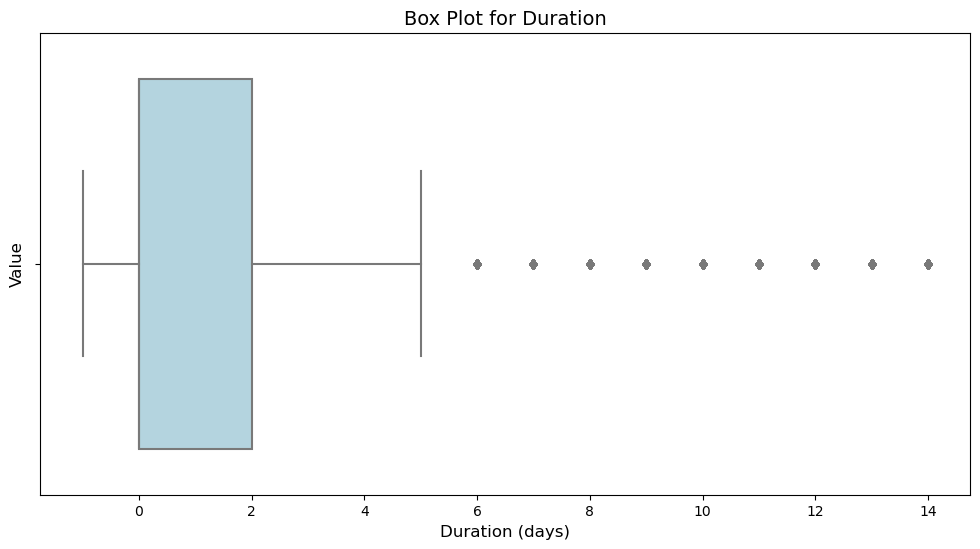

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(x=df["duration"], color='lightblue')

# Set title and labels
plt.title("Box Plot for Duration", fontsize=14)
plt.xlabel("Duration (days)", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Show the plot
plt.show()


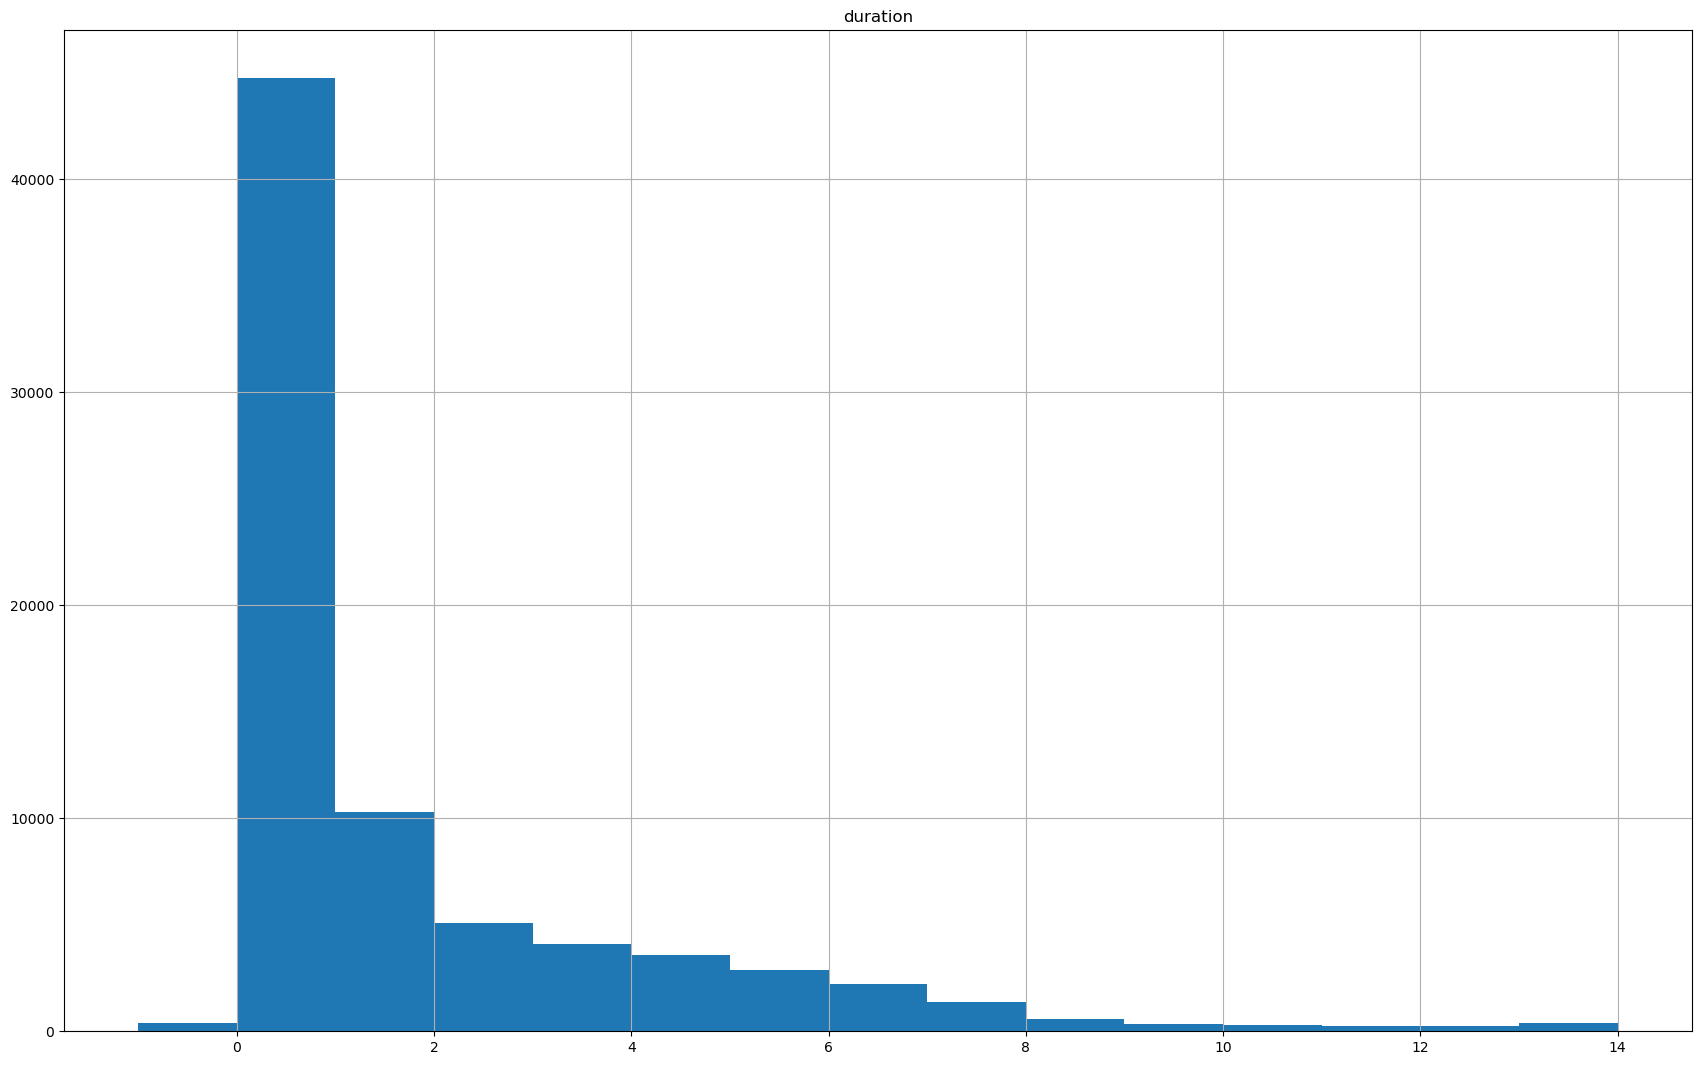

In [51]:
df.hist(bins=15, figsize=(21,13));

## Frequency distribution plots for Catergorical features 

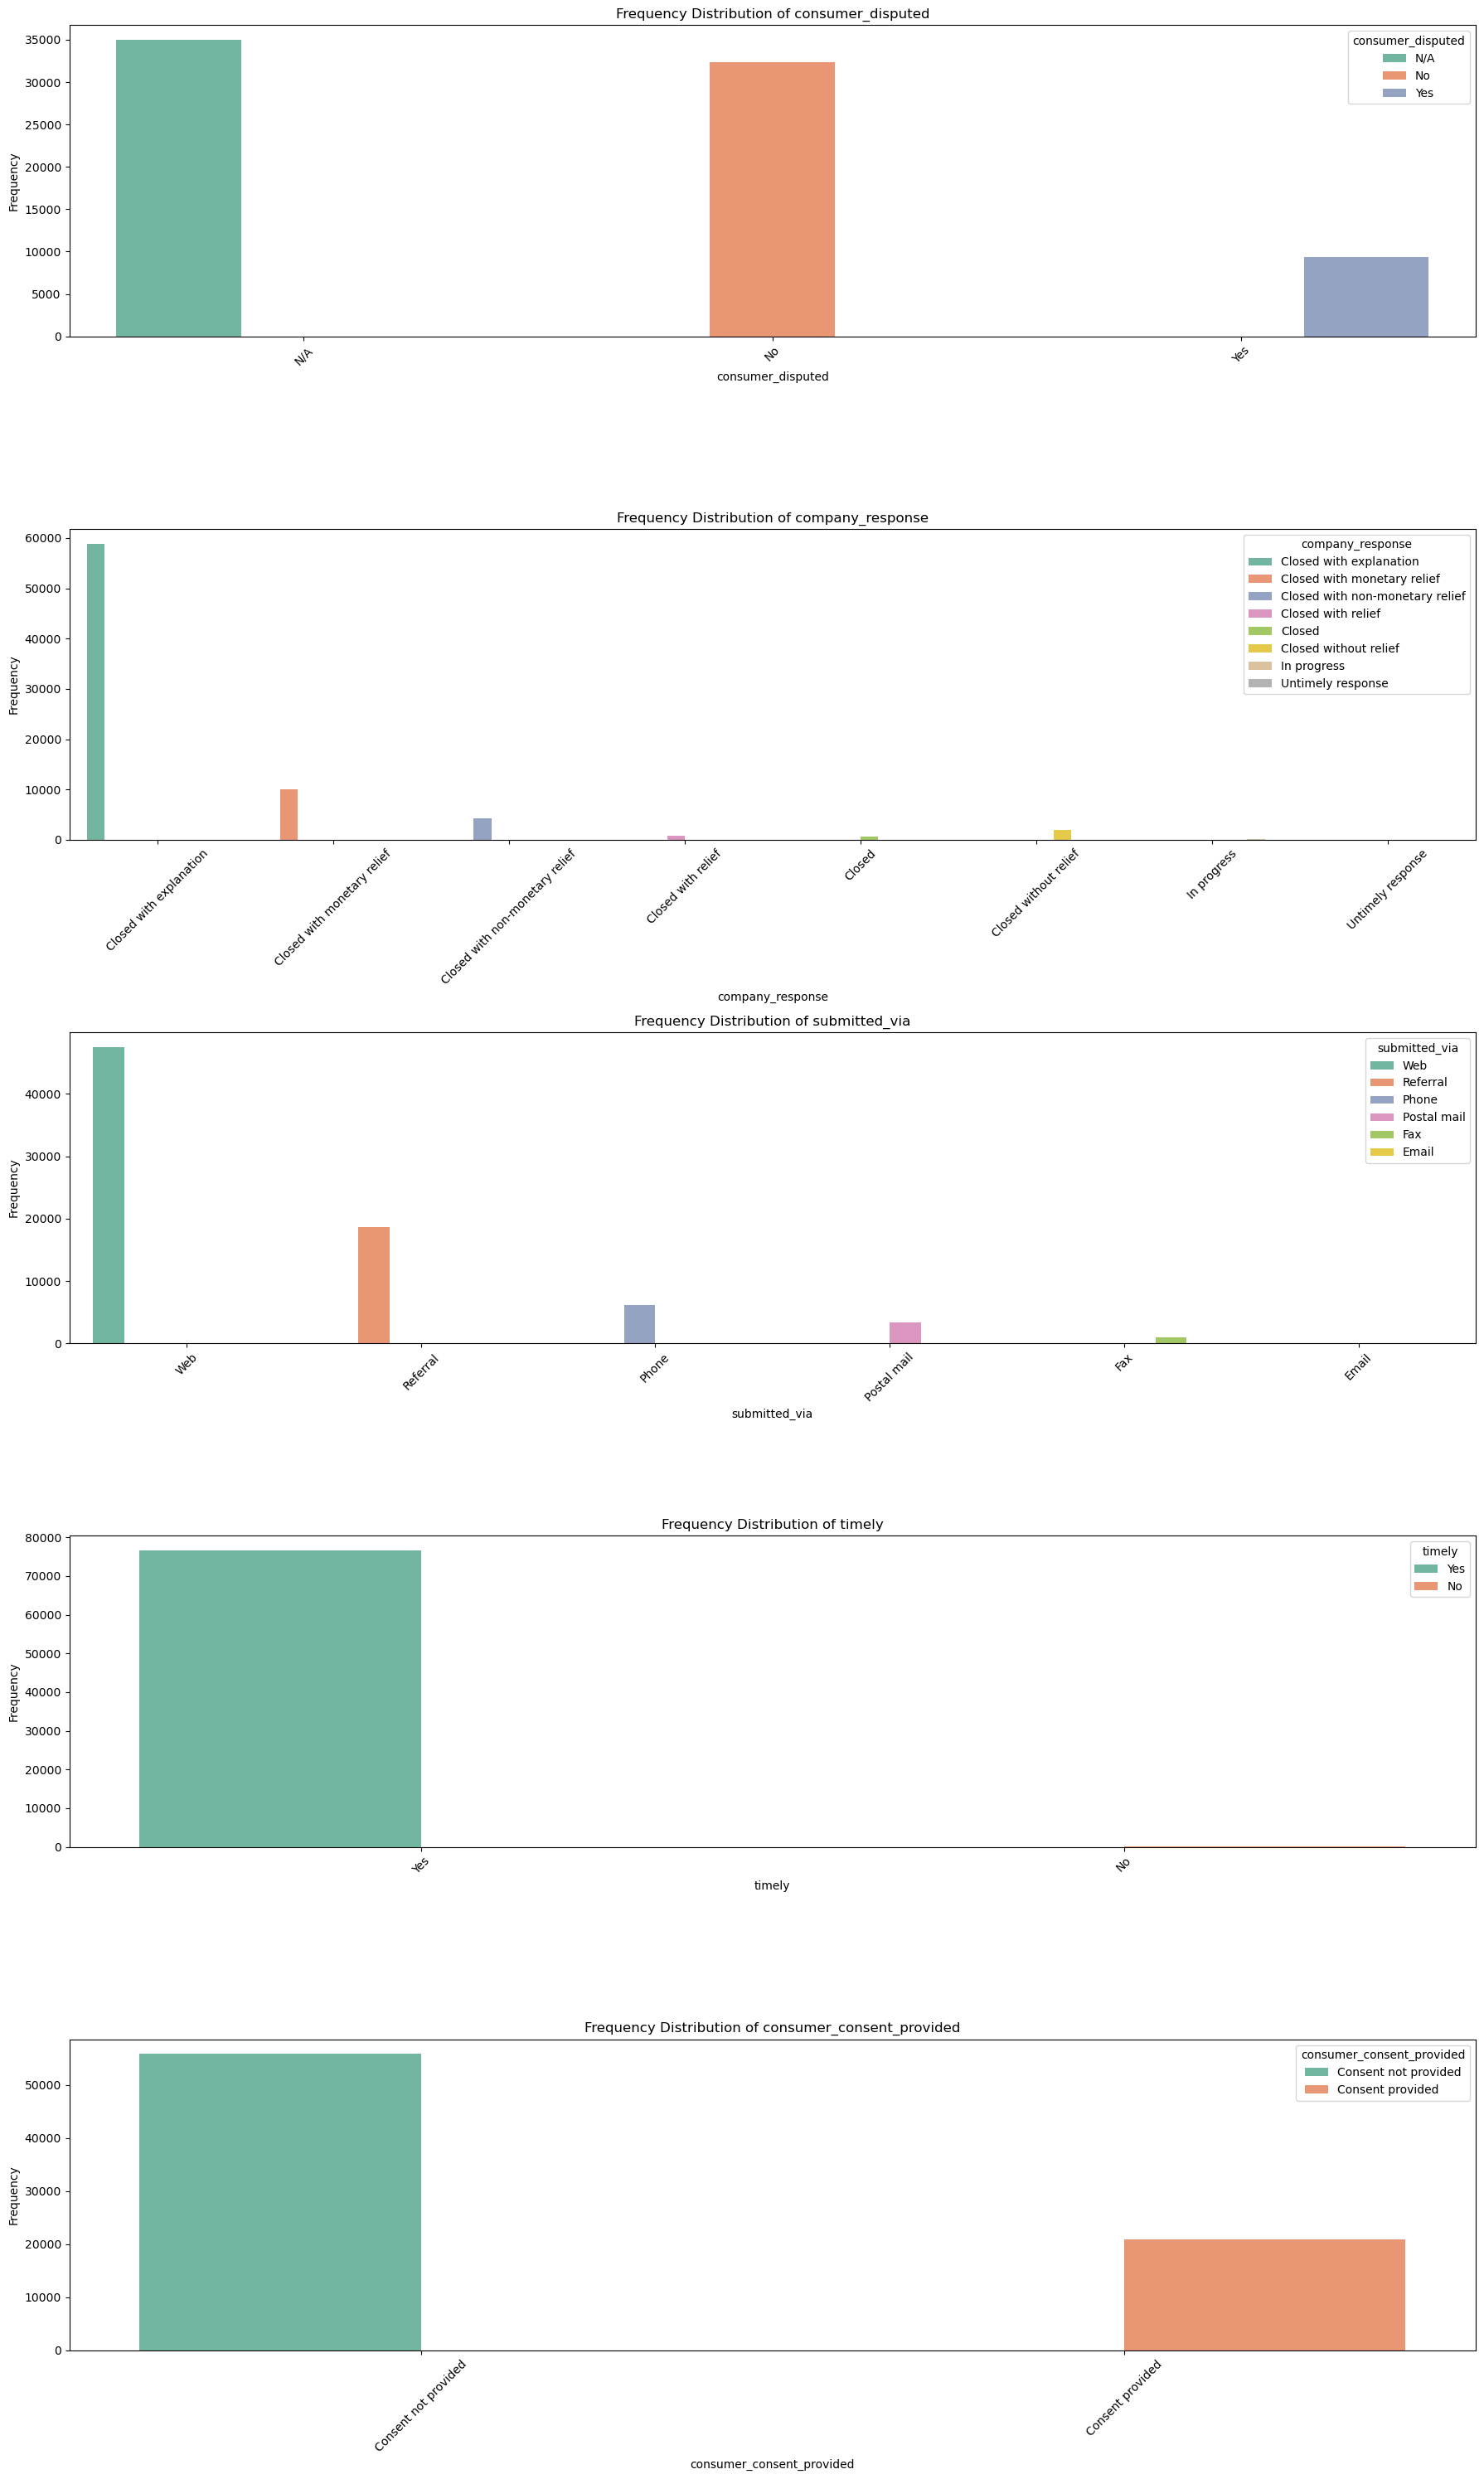

In [52]:
# Specify the categorical columns you want to plot
cat_columns = ['consumer_disputed', 'company_response', 'submitted_via', 'timely', 'consumer_consent_provided']

# Define grid layout for the subplots
rows, cols = 5, 1  # Adjusted grid layout since you have 2 columns to plot
fig, axes = plt.subplots(rows, cols, figsize=(18, 30))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Loop through each column and plot using Seaborn's countplot
for i, column in enumerate(cat_columns):
    # Use Seaborn's countplot for categorical data
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2', hue=column)
    
    # Set plot title and labels
    axes[i].set_title(f'Frequency Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

plt.tight_layout()
plt.show()

### States with most issues 

In [53]:
import plotly.express as px
import pandas as pd

# Count occurrences of each state
state_counts = df["state"].value_counts().reset_index()[:10]
state_counts.columns = ["State", "Count"]  # Rename columns for clarity

# Create a bar chart using Plotly Express
fig = px.bar(
    state_counts, 
    x="State", 
    y="Count", 
    title="Frequency Distribution of States",
    labels={"State": "State", "Count": "Number of Complaints"},
    color="State",  # Different colors for each state
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    width=1000, 
    height = 700, 
    bargap = 0.1
)

# Show the figure
fig.show()


In [54]:
df.columns

Index(['issue', 'state', 'consumer_disputed', 'product', 'company_response',
       'submitted_via', 'timely', 'complaint_what_happened',
       'consumer_consent_provided', 'complaint_received_date',
       'complaint_sent_date', 'duration'],
      dtype='object')

### Issues

In [55]:
import plotly.express as px
import pandas as pd

# Count occurrences of each state
state_counts = df['issue'].value_counts().reset_index()[:7]
state_counts.columns = ['issue', "Count"]  # Rename columns for clarity

# Create a bar chart using Plotly Express
fig = px.bar(
    state_counts, 
    x='issue', 
    y="Count", 
    title="Frequency Distribution of Issues",
    labels={'issue': 'Issue', "Count": "Number of Complaints"},
    color='issue',  # Different colors for each state
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    width=1000, 
    height = 600, 
    bargap = 0.1
)

# Show the figure
fig.show()


### Product 

In [56]:
import plotly.express as px
import pandas as pd

# Count occurrences of each state
state_counts = df['product'].value_counts().reset_index()[:7]
state_counts.columns = ['product', "Count"]  # Rename columns for clarity

# Create a bar chart using Plotly Express
fig = px.bar(
    state_counts, 
    x='product', 
    y="Count", 
    title="Frequency Distribution of Products",
    labels={'product': 'Types of Products', "Count": "Number of Complaints"},
    color='product', # Different colors for each state
    color_discrete_sequence=px.colors.qualitative.Set2,
    
)
fig.update_layout(
    width=1000, 
    height = 600, 
    bargap = 0.1
)

# Show the figure
fig.show()


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76693 entries, 0 to 78312
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   issue                      76693 non-null  object
 1   state                      76693 non-null  object
 2   consumer_disputed          76693 non-null  object
 3   product                    76693 non-null  object
 4   company_response           76693 non-null  object
 5   submitted_via              76693 non-null  object
 6   timely                     76693 non-null  object
 7   complaint_what_happened    76693 non-null  object
 8   consumer_consent_provided  76693 non-null  object
 9   complaint_received_date    76693 non-null  object
 10  complaint_sent_date        76693 non-null  object
 11  duration                   76693 non-null  int32 
dtypes: int32(1), object(11)
memory usage: 7.3+ MB


In [58]:
df.head()

issue state consumer_disputed  \
0   Attempts to collect debt not owed    CA               N/A   
1     Written notification about debt    GA               N/A   
2  Other features, terms, or problems    TX               N/A   
3      Trouble during payment process    MI               N/A   
4                    Fees or interest    NY               N/A   

                       product         company_response submitted_via timely  \
0              Debt collection  Closed with explanation           Web    Yes   
1              Debt collection  Closed with explanation           Web    Yes   
2  Credit card or prepaid card  Closed with explanation           Web    Yes   
3                     Mortgage  Closed with explanation           Web    Yes   
4  Credit card or prepaid card  Closed with explanation      Referral    Yes   

                             complaint_what_happened  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

  consumer_consent_provided complaint_received_date complaint_sent_date  \
0      Consent not provided              2019-04-13          2019-04-13   
1          Consent provided              2019-05-01          2019-05-01   
2          Consent provided              2019-04-02          2019-04-02   
3      Consent not provided              2017-09-13          2017-09-14   
4      Consent not provided              2019-04-05          2019-04-05   

   duration  
0         0  
1         0  
2         0  
3         1  
4         0

## EXPLORATORY DATA ANALYSIS

## Univariate Analysis

In [63]:
df.columns

Index(['issue', 'state', 'consumer_disputed', 'product', 'company_response',
       'submitted_via', 'timely', 'complaint_what_happened',
       'consumer_consent_provided', 'complaint_received_date',
       'complaint_sent_date', 'duration'],
      dtype='object')

### 1.Number of Complaints per Product

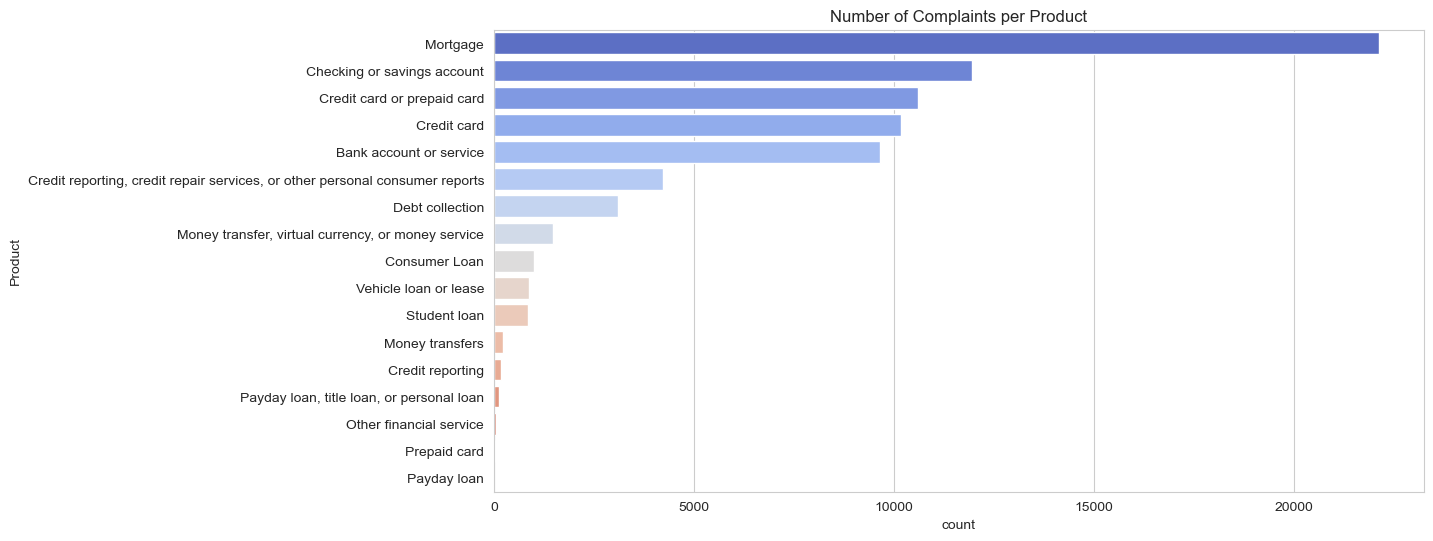

In [59]:
#set plot style
sns.set_style("whitegrid")

#count plot per product
plt.figure(figsize=(12,6))
sns.countplot(y=df["product"], order=df["product"].value_counts().index, palette="coolwarm")

plt.title("Number of Complaints per Product")
plt.xlabel("count")
plt.ylabel("Product");

### 1.2 Complaints Over Time

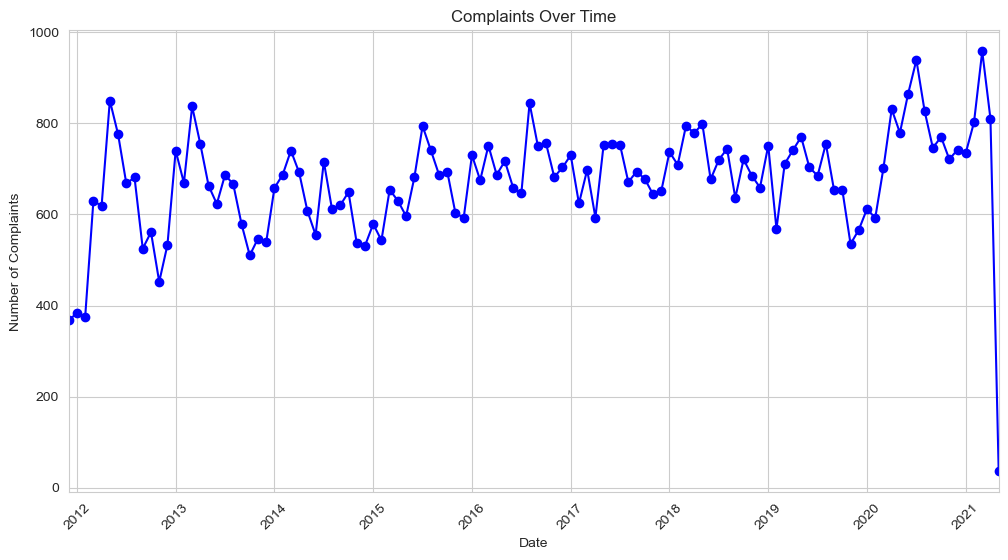

In [101]:

df["complaint_received_date"] = pd.to_datetime(df["complaint_received_date"])
plt.figure(figsize=(12,6))
df.resample("M", on="complaint_received_date")["issue"].count().plot(kind="line", marker="o", color="b")

plt.title("Complaints Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Complaints");
plt.xticks(rotation=45);

### 1.3 Top 10 Companies with the Most Complaints

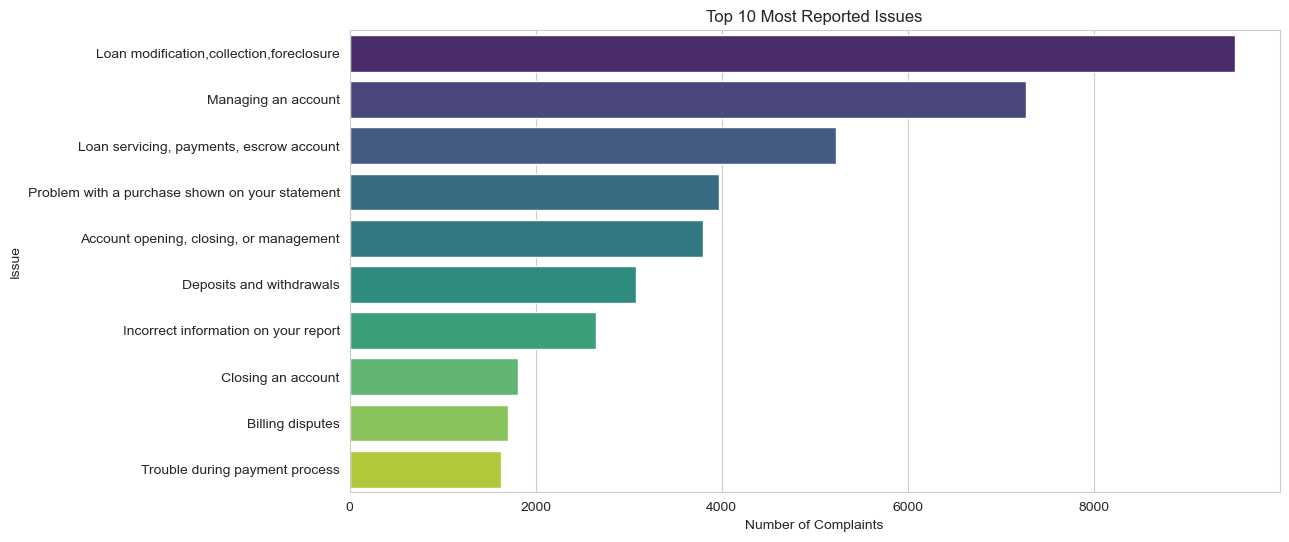

In [106]:
top_issues = df["issue"].value_counts().nlargest(10)
plt.figure(figsize=(12,6))

sns.barplot(y=top_issues.index, x=top_issues.values, palette="viridis")
plt.title("Top 10 Most Reported Issues")
plt.xlabel("Number of Complaints")
plt.ylabel("Issue");


### 1.4 Consumer Dispute Distribution

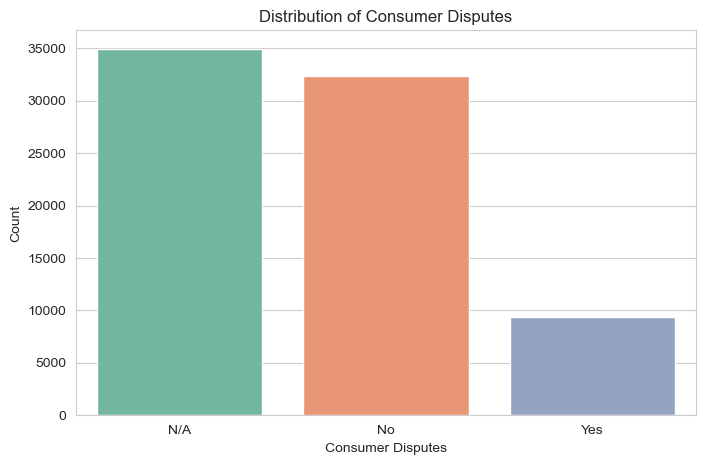

In [70]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["consumer_disputed"], palette="Set2")

plt.title("Distribution of Consumer Disputes")
plt.xlabel("Consumer Disputes")
plt.ylabel("Count");

# Bivariate Analysis

### 2.1 Consumer Dispute by Product

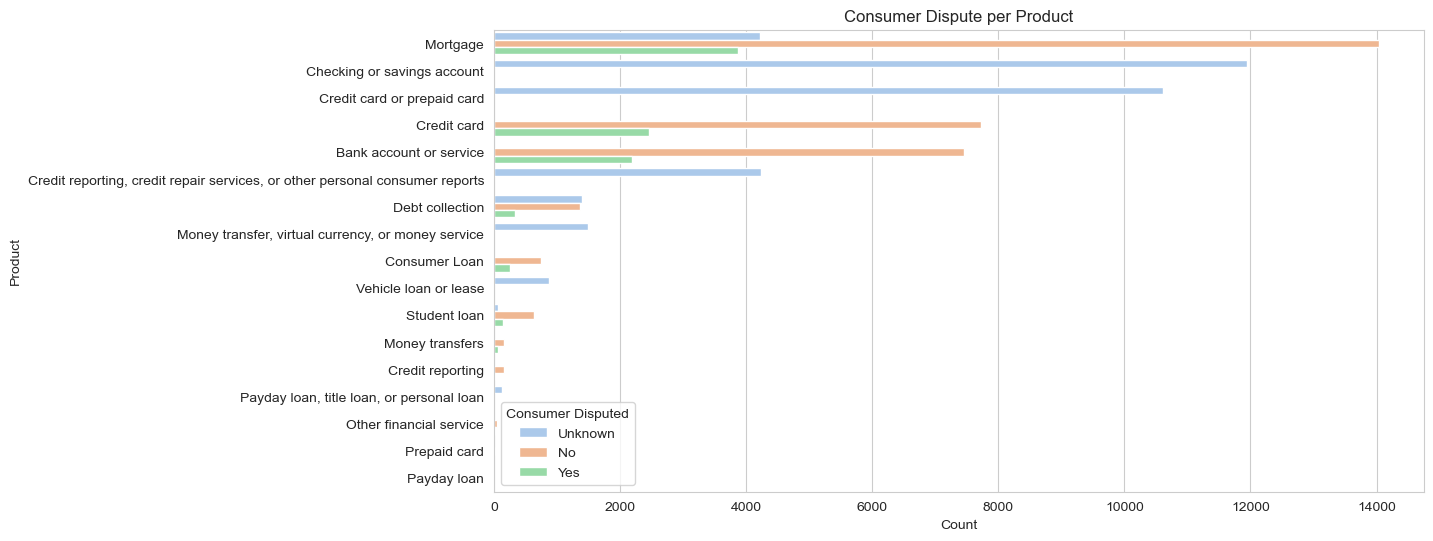

In [108]:
df["consumer_disputed"] = df["consumer_disputed"].replace("N/A", "Unknown").astype(str).str.strip()
plt.figure(figsize=(12,6))
sns.countplot(y=df["product"], hue=df["consumer_disputed"], order=df["product"].value_counts().index, palette="pastel")


plt.title("Consumer Dispute per Product")
plt.xlabel("Count")
plt.ylabel("Product");
plt.legend(title="Consumer Disputed");


**Observation**

Mortagage, credit cards and checking/savings accounts have the highest number pof disputes.

Some products ie payday loans, prepaid cards have significantly fewer complaints.

### 2.2 Comapany Response vs Consumer Dispute

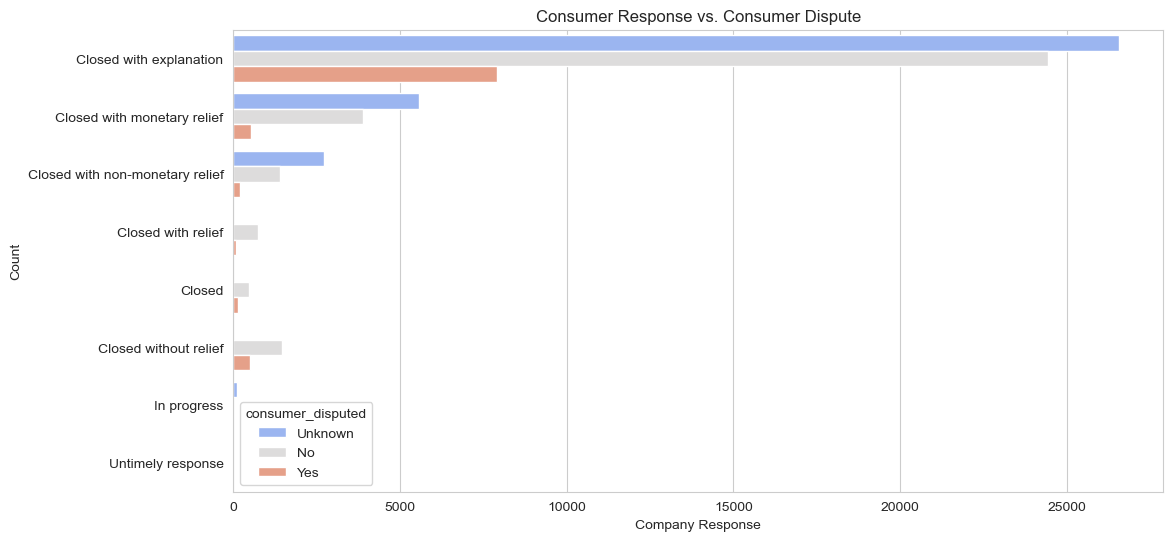

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y="company_response", hue="consumer_disputed", palette="coolwarm")

plt.title("Consumer Response vs. Consumer Dispute")
plt.xlabel("Company Response")
plt.ylabel("Count");
#plt.legend(title="Consumer Disputed");


1.The majority of complaints are Closed with Explanation which were not disputed suggesting that simply oproviding and explanation often satisfies consumers.

2."Closed with Monetary Relief" and "Closed with Non Monetary Relief responses show lower counts than "Closed with Explanation", consumers are less likely to create a dispute if they receive financial compensation.

3.Some company responses have higher proportions of disputes cases "Closed without Relief" implying that when companies deny releif customers are more likely to challenge the outcome.

4."The Untimely Response" is rare however, if untimely, a proportion of these complaints are disputed.

### 2.3 Timely Response vs Consumer Dispute

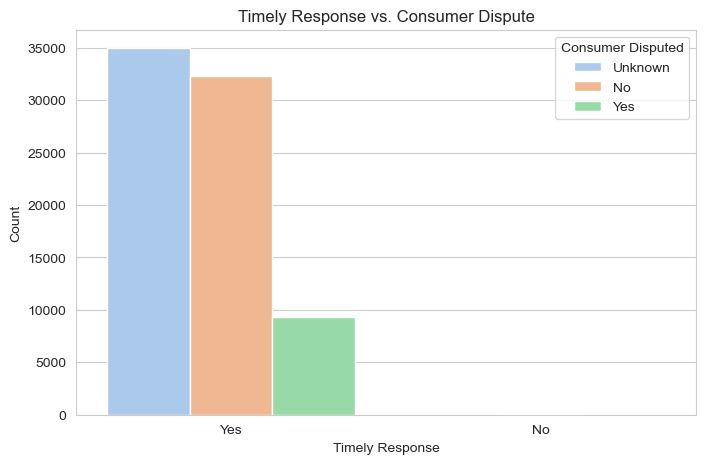

In [110]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="timely", hue="consumer_disputed", palette="pastel")

plt.title("Timely Response vs. Consumer Dispute")
plt.xlabel("Timely Response")
plt.ylabel("Count");
plt.legend(title="Consumer Disputed");


**Observation**

1.Most complaints receive a timely response, the 'Yes' catergory(timely response) has higher counts than "No".

2.Complaints are responded to on time but a number of disputes still occur,timely responses reduce but dont eliminate disputes.

3.The "No" category has few complaibta ovearally.Few complaints receive late responses but they may contribute to higher dispute rates.

# 3.1 Multivariate Analysis

### Complaints by Product, State and Timely Response

<Figure size 1800x1000 with 0 Axes>

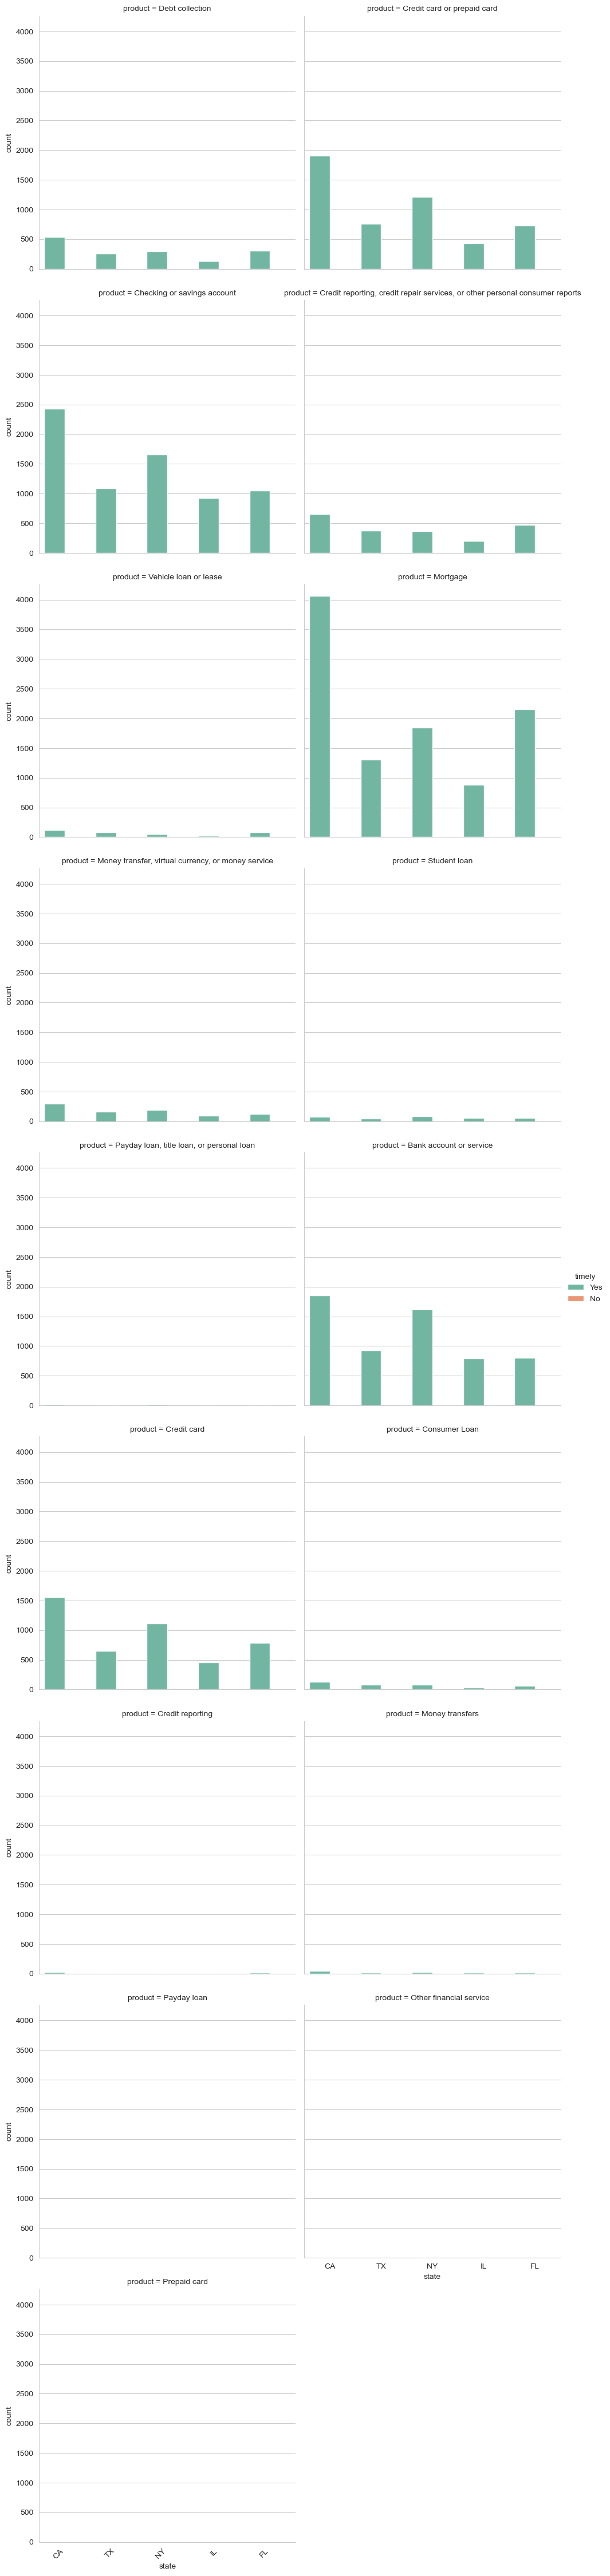

In [114]:
plt.figure(figsize=(18,10))
top_products = df["product"].value_counts().nlargest(5).index
df_filtered = df[df["product"].isin(top_products)]

top_states = df["state"].value_counts().nlargest(5).index
df_filtered = df[df["state"].isin(top_states)]

sns.catplot(data=df_filtered, x="state", hue="timely", col="product", kind="count", col_wrap=2, palette="Set2")
plt.xticks(rotation=90);
plt.xticks(rotation=45, ha="right");

In [ ]:
**Observation**

1. Certain states have a higher volume of complaints especially for mortgages and credit cards.
Timely responses vary across states ewith some states showing a ahigher propprtion of delayed responses.

### 3.2 Heatmap of Complaints by State and Product

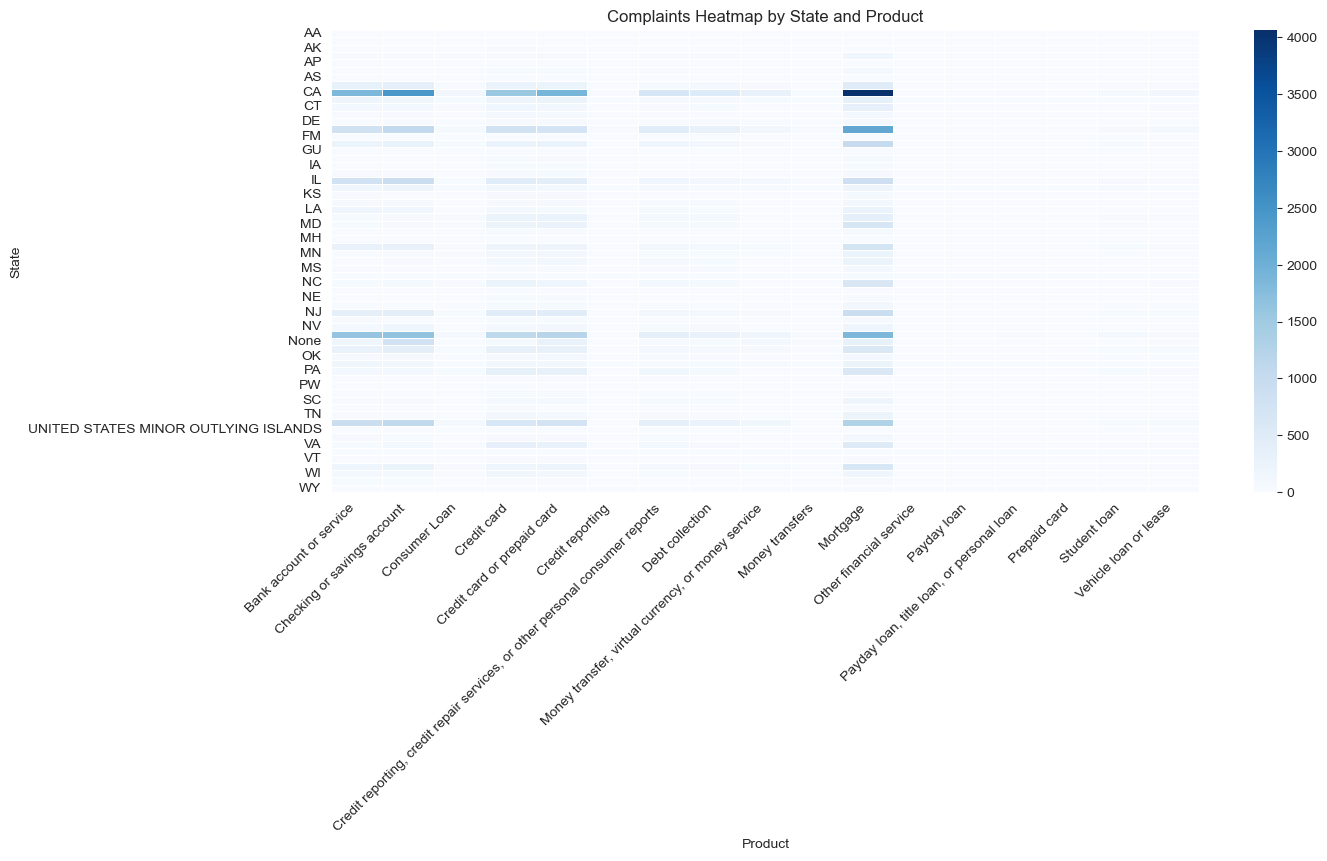

In [115]:
plt.figure(figsize=(14,6))

sns.heatmap(df.groupby(["state", "product"]).size().unstack(fill_value=0), cmap="Blues", linewidths=0.5)
plt.title("Complaints Heatmap by State and Product")
plt.xlabel("Product")
plt.ylabel("State");
plt.xticks(rotation=45, ha="right");
#plt.legend(title="Consumer Disputed");

**Observation**

1.Certain products such as Mortgage, Credit Cards and Bank Accounts show darker shades in multiple states indicating a higher volume of complaints.
Some financial products eg Vehicle Loan or Leas, Payday Loan have fewer complaints across all states.

2.States like California(CA), Texas(TX), Florida(FL) and New York(NY) have more complaints across multiple products.

3.Some states and products have very few or no complaints leading to white areas in the heatmap.

4.High complaint states aqnd products can indicate customer dissatisfaction regulatory concerns or market specific challenges.